<a href="https://colab.research.google.com/github/inmas-training/fa21-statistical-methods-workshop/blob/main/01a-data-manipulation-with-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we discuss data manipulation in Python using Pandas!  Pandas provides the _R_ equivalent of Data Frames in _Python_. 

For help with Pandas, we recommend looking at: 

- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html#api)

## Diagnostics

In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

print(f"python: {sys.version}")
print(f"pandas: {np.__version__}")
print(f"tensorflow: {tf.__version__}")
# Detect if a GPU is present
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  print(f"GPU Enabled: True")
else:
  print(f"GPU Enabled: False")

try:
  from google.colab import drive
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



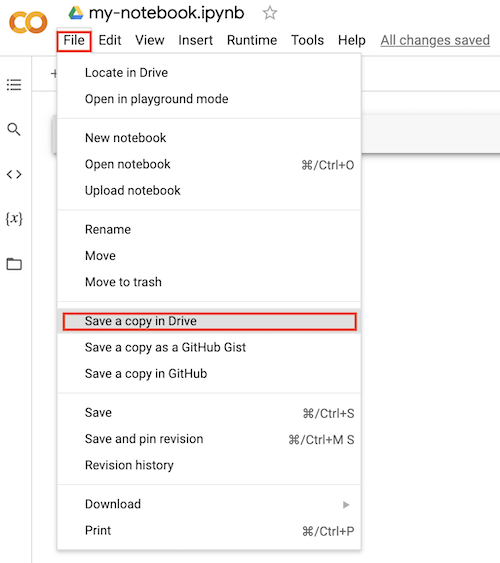

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

# Packages

Packages in Python are extensions to the base language that provide improved features or new abilities.

### Checking a package is installed

Prior to attempting to use a package, make sure it is present within the relevant Python environment setup.

Found: 

In [ ]:
import sys

'pandas' in sys.modules

Not found:

In [ ]:
'toad' in sys.modules

## Importing a package

There are three ways to enable features in a Python-package:

- `import pandas`
   - all sub-modules and functions in the pandas module are accessible with `pandas.*`
   - e.g: `pandas.DataFrame({'A': 1.})`
- `import pandas as pd`,
   - create an alias for the namespace yielding methods being accessed by `pd.*`
   - e.g: `pd.DataFrame({'A': 1.})`
- `from pandas import *`
   - all functions will be loaded into the local namespace.
   - e.g: `DataFrame({'A': 1.})`

### Your Turn: Import the pandas package

Before continuing, please import `pandas` into the Python environment by creating an alias using your own initials, e.g. John Doe would be `jd`. Then, check the name of the package with `.__name__` method and `.__version__`

In [ ]:
## Code here

# Pandas


## Load Pandas

To use pandas, we must first import the package. Throughout the course, we'll be using a namespace alias of `pd` instead of purely importing `pandas`.

For each notebook, we'll also include the version of pandas installed for compatibility purposes.

In [ ]:
import pandas as pd
pd.__version__

Now, we recommend setting limitations to the number of observations (rows) and variables (columns) traditionally shown by Pandas' data frame `display()` function.

In [ ]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Series

Series are a 1 Dimensional Object.
Effectively a "column" in a data frame. 

To begin, let's create a list of cities.

In [ ]:
# Create a list of cities
cities_list = [
  'Champaign', 'Chicago', 'Springfield', 
  'Elmhurst', 'Bloomington', 'Iowa City',
  'St. Louis', 'West Lafayette', 'Baltimore',
  'Newark', 'College Park']

print(cities_list)

From the list, we can convert it into a pandas series with `pd.Series(my_list)`.

In [ ]:
import pandas as pd

# Construct series from list
cities_series = pd.Series(cities_list)

# Show output
print(cities_series)

We can see what the first observation in the series would be by using `[position]` accessor.

In [ ]:
cities_series[0]

When grouping values under a series, it is helpful to provide an explanation of what is being contained within the series. We can associate a name to each series by using the member variable `.name` 

In [ ]:
cities_series.name = 'City Names'
cities_series

Notice, the index is numeric. We can change how indexes are formed by supplying our own indices during the creation. 

In [ ]:
# Add custom indices
cities_series_alpha_idx = pd.Series(
 cities_list, index = ['a','c','b', 'f', 'g', 'e', 'z', 'y', 'q', 'v', 'r']
)

print(cities_series_alpha_idx)

### Your Turn: Writing a Series with First Names 

Create a Series containing the `firstname` of everyone in your group!

In [ ]:
## Code here

## Data Types

Pandas differs from Python Data Types due to the nature of specialized data.

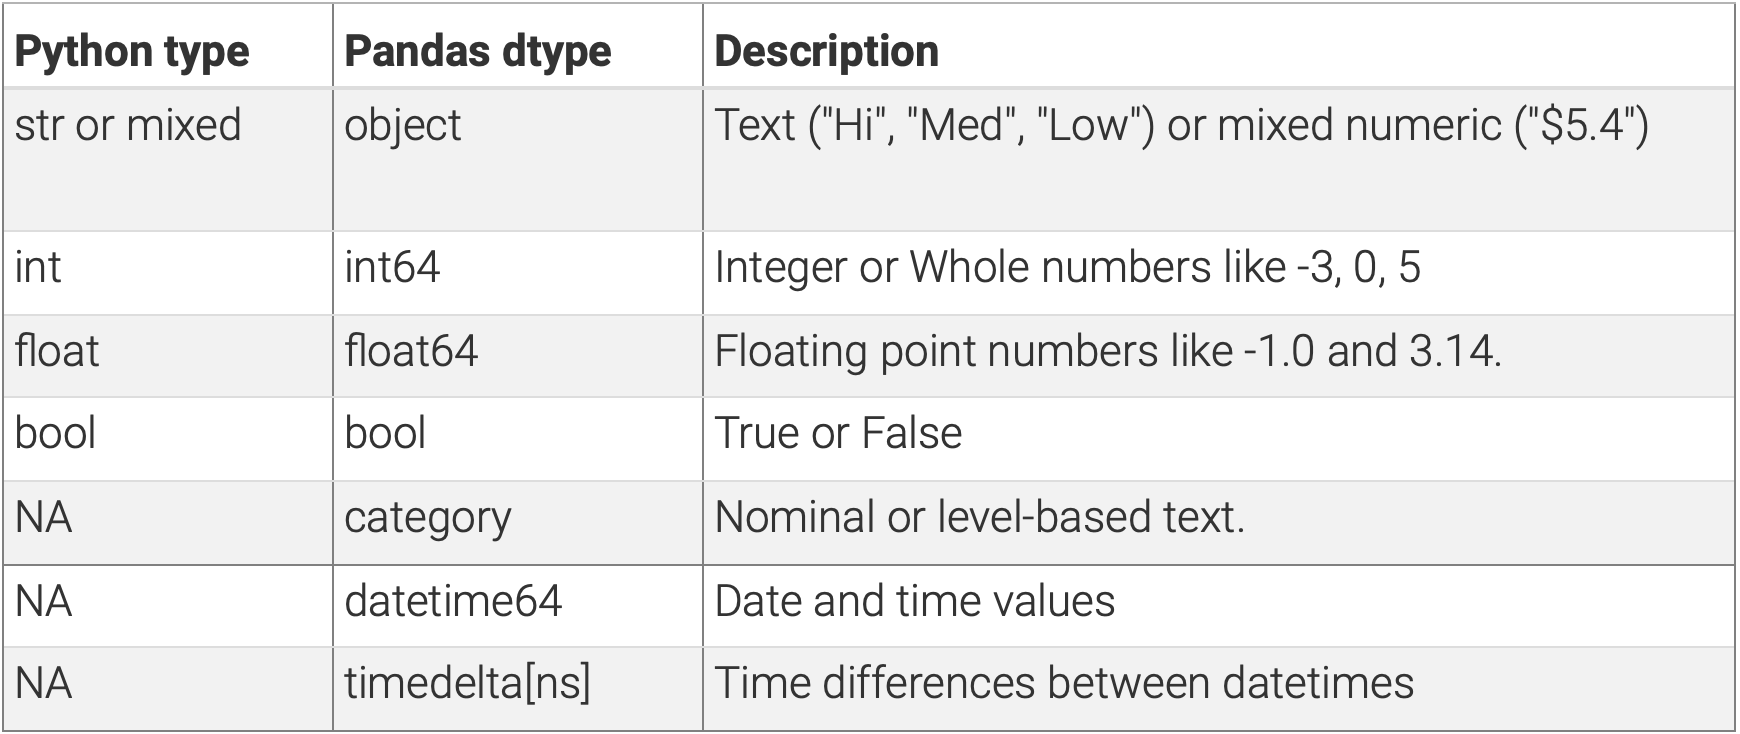

## DataFrame

DataFrame represents a table of relational data with rows and named series that is able to store _heterogenous_ or _mixed_ data types.

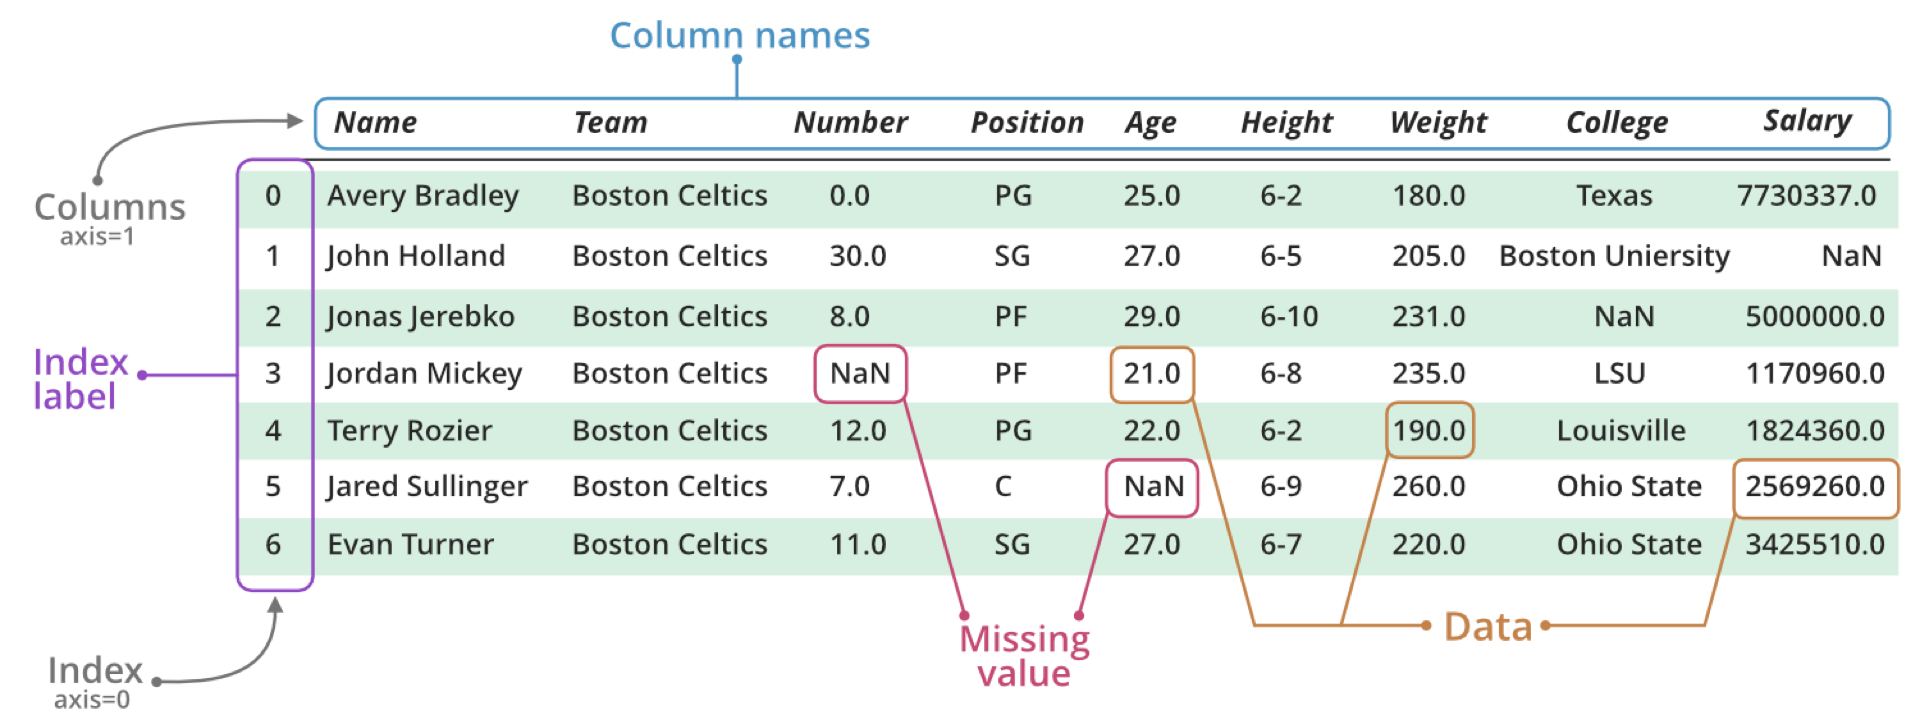

`NaN` is short-hand for indicating a value is "Not a Number". Values denoted with `NaN` are indicative of missing values being present in the data. 

Axis will denote how a given operation should take place:

- **column-wise**: across the rows under a given column
- **row-wise**: across the columns under a given row

To help visualize axis operations, consider the orientations books take on a shelf. If we wanted to read the book title, we would: 

- read vertically with `axis = 1`.
- read horizontally with `axis = 0`.

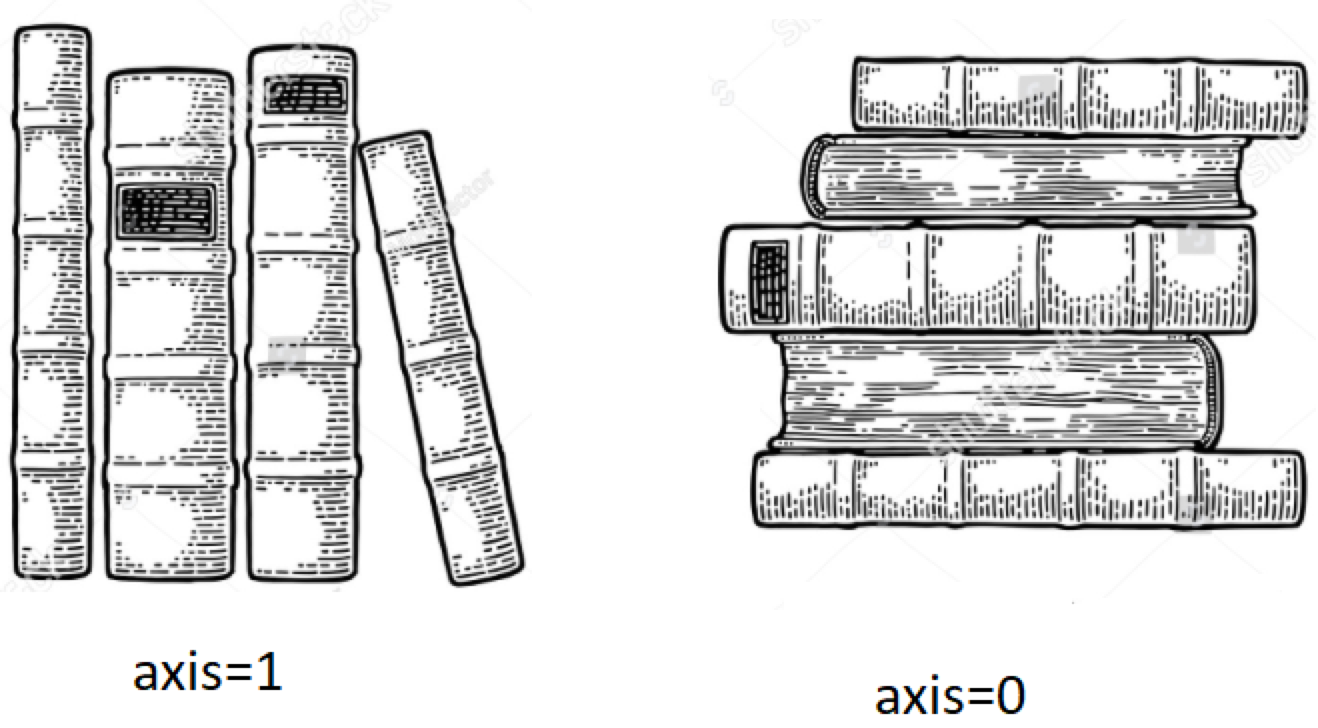

With this understanding, we can construct our first data table: 

In [ ]:
import pandas as pd

city_names = pd.Series([
  'Champaign', 'Chicago', 'Springfield', 
  'Elmhurst', 'Bloomington', 'Iowa City',
  'St. Louis', 'West Lafayette', 'Baltimore',
  'Newark', 'College Park'])

city_state = pd.Series([
  'IL', 'IL', 'IL',
  'IL', 'IN', 'IA',
  'MO', 'IN', 'MD',
  'DE', 'MD'])

# Values from 2019 for each city
city_population = pd.Series([
  87636, 271*10**4, 115888,
  46463, 84116, 74950,
  308174, 48551, 609032,
  33448, 32159])

# Construct DataFrame
city_df = pd.DataFrame({
    'State': city_state, 
    'City':  city_names, 
    'Population': city_population })

# Bare bones print
print(city_df)

For each data set we create, we should also write a "codebook" or "data dictionary" that describes each variable alongside of possible values. 

- `State`: (string) Name of State. Possible values: IL, IA, IN, MO, MD, DE
- `City`: (string) Name of City.
- `Population`: (integer) Number of People Residing in the given City based on census data. 

A better way to print `DataFrame` objects is to use `display()`. This creates the same information, but with a formatted HTML table. We'll remind you of this fact once more in the next notebook.

In [ ]:
# Improved print method for DataFrames
display(city_df)

### Your Turn: Making a DataFrame with Web Data

Create three distinct series for storing: `Date`, `Zipcode`, and `Temperature`. Fill the series by looking up the weather information for Champaign, IL 61820 and where you reside for the next 5 days. Obtain this information from: <https://weather.com> 

Using the three series, construct a pandas DataFrame called `weather_data`.




In [ ]:
# 1. Data Frame Construction
import pandas as pd


What happens when `pd.DataFrame()` is called directly with a `dictionary` and `list`?


In [ ]:
# 2. Constructing a DataFrame from a dictionary
import pandas as pd


What does the dual construction imply about the series structure?

... answer here ... 

## DataFrame Attributes

With the DataFrame now made, let's take a look at some properties of the underlying attributes. Attributes can be viewed in synonymous way with metadata or data descriptions.

| df.attribute | Description                                    |
|:-------------|------------------------------------------------|
| .dtypes      | list the types of the columns                  |
| .columns     | list the column names                          |
| .axes        | list the row labels and column names           |
| .ndim        | number of dimensions                           |
| .size        | number of elements                             |
| .shape       | return a tuple representing the dimensionality |
| .values      | numpy representation of the data               |



First, we always want to make sure to see the shape of the data. 

In [ ]:
city_df.shape

From the shape, we can also obtain the number of rows and number of columns:

In [ ]:
n_rows = city_df.shape[0]
n_columns = city_df.shape[1]

print(f"Rows: {n_rows}")
print(f"Columns: {n_columns}")

The total number of elements stored in the data can also be obtained:

In [ ]:
city_df.size

Notice, this size matches the product of the DataFrame's dimensions.

We can also see the names of each column by using:

In [ ]:
city_df.columns

We can also learn about the type of data stored in each column with:

In [ ]:
city_df.dtypes

### Your Turn: Retrieving the First Variable Name

Using the `weather_data` previously constructed, please retrieve the name of the first column. 

In [ ]:
## Code here 

## DataFrame Methods

Unlike DataFrame attributes, the methods provide a series of built-in functions. These functions seek to apply an action onto the column instead of passively accessing existing metadata. 

```python
# Looking at properties
df.attribute 

# Applying an action to the data frame
df.method()
```

There are quite a few actions available:


| df.method()              | Description                                                |
|:--------------------------|:------------------------------------------------------------|
| info() | Overview of the Data Properties                                          |
| head( [n] ), tail( [n] ) | First/last n rows                                          |
| describe()               | Generate descriptive statistics (for numeric columns only) |
| max(), min()             | Max/min values for all numeric columns              |
| mean(), median()         | Mean/median values for all numeric columns          |
| std()                    | Standard deviation                                         |
| sample([n])              | Random sample of the data frame                  |
| dropna()                 | Drop all the records with missing values                   |


We can improve the depth of information about the data frame we receive by using the `.info()` method.

In [ ]:
city_df.info()

## Numerical Summeries

With the data aligned together, we can obtain a variety of summaries across the data using different methods.

df.method() |  description
---- | --- 
describe() | Basic statistics (count, mean, std, min, quantiles, max)
count() | Number of Complete (Non-missing) Observations
min(), max() | Minimum and maximum values
mean(), median(), mode() | Arithmetic average, Median and Mode
var(), std() | Variance and Standard Deviation
sem() | Standard Error of Mean
skew() | Sample Skewness
kurt() | Kurtosis


In the case of the `city_df`, we know that only one column is numerical. If we applied [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to the DataFrame, then we would receive only a summary of the numerical column. 

In [ ]:
city_df.describe()

Information is listed as follows:

- count: number of instances in the data. 
- mean: average value of the data:  $$\bar{x} = \frac{x_1+x_2+\cdots +x_n}{n}= \frac{1}{n} \sum_{i=1}^n x_i$$
- sd: standard deviation of the data: $$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$$
- min: minimum value in the data
- max: maximum value in the data
- 25%, 50%, 75%: values found by first sorting the data and, then, looking at the specific quantile. 


## Categorical/Object-based Summaries 

Categorical and object-based columns in the data frame can also be summarized. 

df.method() |  description
---- | --- 
describe() | Basic statistics (count, unique values, top, freq)
nunique() | Number of Unique Values
count() | Number of Complete (Non-missing) Observations
value_counts() | Number of Values by Observation Type

One approach to obtaining such summaries is to explicitly request `object` and `category`.

In [ ]:
city_df.describe(include=['category', object])

Or, we could exclude summaries on numerical values:

In [ ]:
city_df.describe(exclude=[np.number])

Lastly, we can include summaries for both categorical and numerical variables by using `include = "all"`. 

In [ ]:
city_df.describe(include="all")

## Selecting a Single Column

Series that reside inside of a DataFrame can be retrieved in two ways:

- Method 1:   Subset the data frame using column name:

```python
df['City']
```

- Method 2:   Use the column name as an attribute:

```python
df.City
```

Aside: The second approach saves a few keystrokes. However, there is an pandas attribute called `rank`. If a variable is similarly named `rank`, then we would need to specify `df['rank']` to retrieve the data.


We can individually obtain this information by using individual summary statistics functions on the data frame column. For instance, obtaining the mean is done by:

In [ ]:
city_df['Population'].mean()

### Your Turn: Retrieve a single column 

From the `weather_data` data set, please retrieve the `Zipcode` variable. Next, please obtain a count of each `Zipcode` present in the DataFrame. 

In [ ]:
## Code Here

# Data Manipulation



## Accessing Data 

There are five ways to access data 

- `[ ]`: column subset
- `.loc[]`: label-based, DF
- `.iloc[]`: position-based, DF
- `.at[]`: label-based, scalar
- `.iat[]`: position-based, scalar

**Definitions:**

- **Label:** Named value
- **Position:** Integer location

Previously, `.ix()` was used for access. However, as of Pandas 1.0.0, it has been deprecated in favor of `.loc()` and `.iloc()`.

Retrieve first row's *observation*

In [ ]:
city_df.iloc[0:1, :]

Retrieve the first and second row observations.

In [ ]:
city_df.iloc[0:2, :]

Retrieve first and third observations.

In [ ]:
city_df.iloc[[0, 2], :]

All observations in the first column

In [ ]:
city_df.iloc[:, 0:1]

Retrieve first observation in `City` variable.

In [ ]:
city_df.at[0, 'City']

### Your Turn: Accessing the Last Row

Obtain the last observation of the data frame dynamically. That is, we cannot use a number like 3 to denote the end row as that might not be the total number of rows contained in the DataFrame. In particular, we need to operate on the principle that there are $n$ rows.  Recall that Python uses a 0 - based indexing system, e.g. 0, 1, 2, ..., $n - 1$, which means the $n$-th row will be the $n - 1$ row.

In [ ]:
# Code here

## Modifying Values

More often than not, the values contained in the initial `DataFrame` may need to be updated or changed. This action is considered a "modification behavior". However, if we are unsure of the modification, we may wish to temporarily work with a new data set that is a duplicate. 


In [ ]:
fix_city_df = city_df.copy(deep = True)

We can modify values by using the access rules and then using the assignment operator `=`. 

In [ ]:
fix_city_df.at[0, 'City'] = "Urbana"

fix_city_df.head(2)

We could also add a new row at the end of the `DataFrame` by creating a dictionary with the same keys as the `DataFrame`:

In [ ]:
new_observation = {'State': 'FL', 'City': 'Dunedin', 'Population': 36381}
fix_city_df = fix_city_df.append(new_observation, ignore_index = True)
fix_city_df.tail(2)

If we have more than one observation, we need to construct a `DataFrame`

In [ ]:
new_observation = pd.DataFrame({
  'State': ['CA', 'WA'] , 
  'City': ['San Francisco', 'Seattle'],
  'Population': [874961, 724305]
})
fix_city_df = fix_city_df.append(new_observation, ignore_index = True)
fix_city_df.tail(5)

### Your Turn: Adding a Row

In the  `weather_data` data set, we only recorded 5 days. Let's say that we really meant to add the temperature for 10 days. Take the existing data set and add 5 more rows.

In [ ]:
## code here

## Sorting Data

Presently, the values of the `city_df` are arranged by the chronological order in which they were added. When looking to see if there are any outliers, or data points that are "not normal" looking, we would want to sort either in ascending (smallest to largest) or descending (largest to smallest) order. 

In [ ]:
city_df.sort_values('Population', ascending = True)

In [ ]:
city_df.sort_values('Population', ascending = False)

We could also sort by two or more columns with differing orders. For example, we could sort the `State` column in descending order and `Population` in the `Ascending` order.

In [ ]:
city_df.sort_values(by = ['State', 'Population'], ascending = [False, True])

However, sorting in this manner would be temporary as we did not save the change into the `city_df` variable.

In [ ]:
display(city_df)

Let's take a moment to save our changes into a new variable called `sorted_city_df`.

In [ ]:
sorted_city_df = city_df.sort_values('Population', ascending = False)
display(sorted_city_df)

Uh-oh, I think we made a mistake when sorting. We _really_ wanted to get values in `Ascending` order instead of `Descending` order. In this case, the mistake can be fixed by consider one of three possible options:

1. create a new object with the correct sorting.
1. alter the previously re-create the `sorted_city_df` 
1. **directly store the results into `sorted_city_df`**

For this case, we would want to set `ascending = True` and add a new parameter `inplace = TRUE`. The latter parameter is the crucial component as it modifies the DataFrame without needing to explicitly use the assignment operator to assign the object back into itself! 

In [ ]:
sorted_city_df.sort_values('Population', ascending = True, inplace = True)

display(sorted_city_df)

### (Aside) In Place

When performing a modification, Pandas will opt to create a new data frame object. For each new object that Pandas creates it will increase the amount of
memory required to stored the information. Plus, it will require the data frame
to be saved to another variable or re-saved to the existing variable. 

The designers of Pandas had this in mind when constructing the API. As a result, one can use `inplace = TRUE` to re-use the existing memory without the need to create a new object or re-save into an existing variable. 

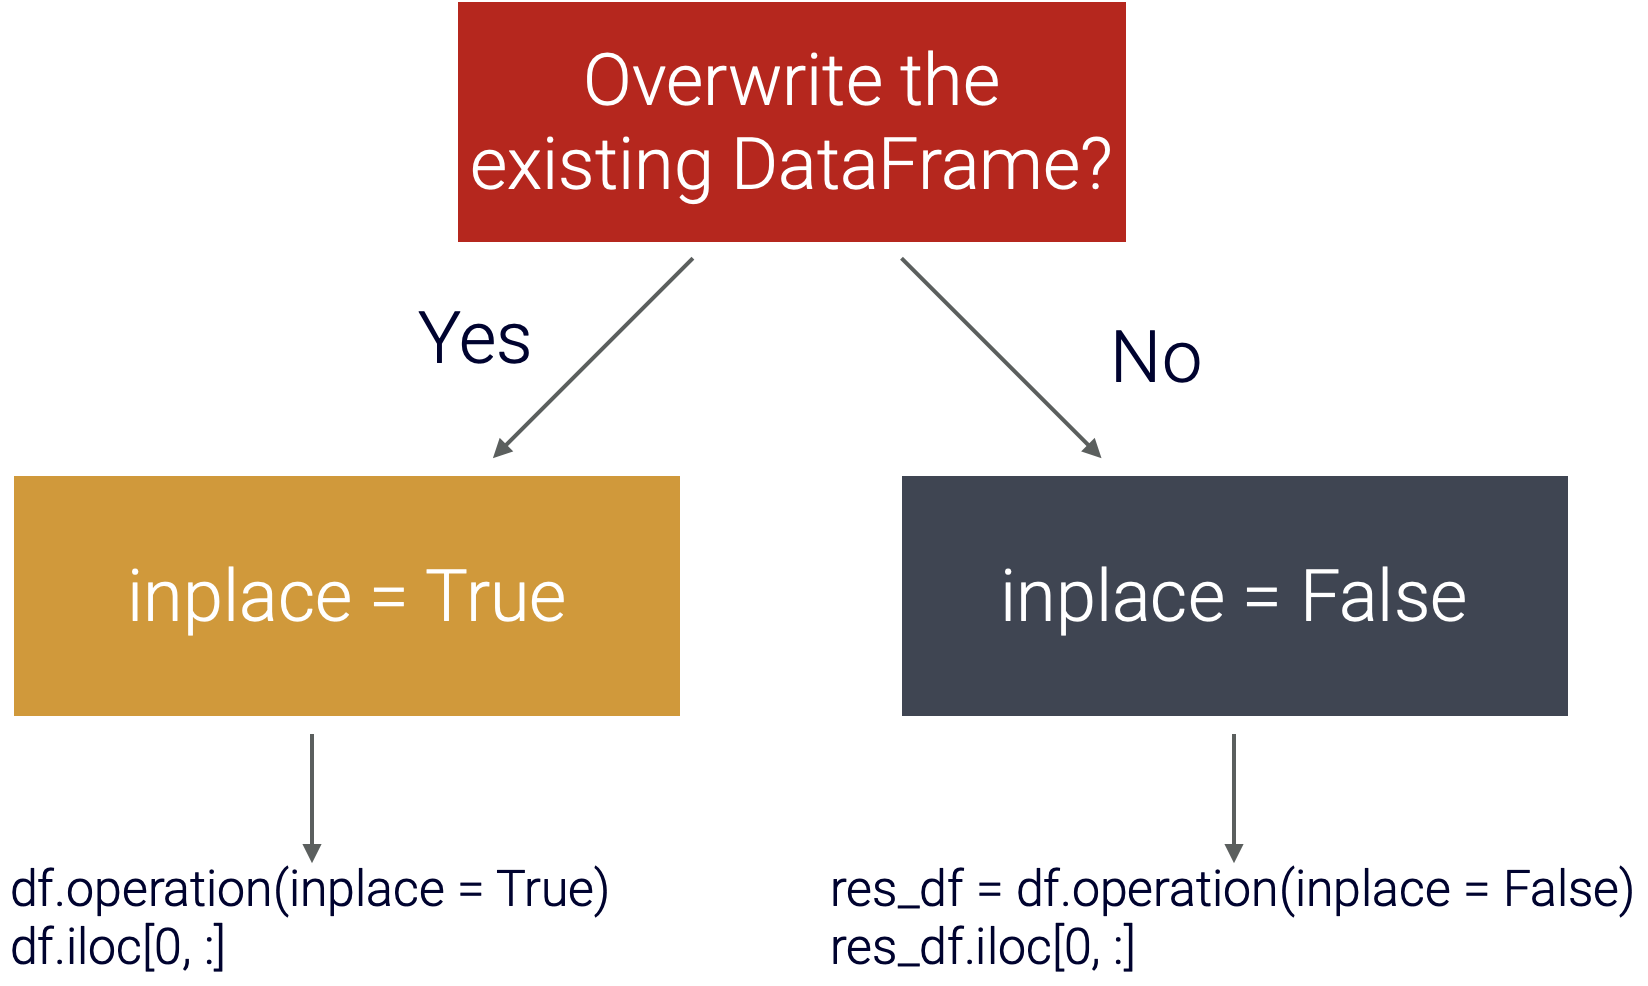

### Your Turn: In Place Sorting

Sort the `city_df` in descending order by `State`. 

Try first sorting without setting `inplace = True` and, then, by setting `inplace = True`.

In [ ]:
## Code here

## Conditionally Accessing Data

Outside of directly specifying what location should be retrieved, we can use more data-driven conditions to obtain values. That is, we can use information within the `DataFrame` that aligns with a prescribed set of criteria given by logical comparisons. 

Logical Comparisons | Description 
-----|-----
x < y | 	less than
x > y	 |greater than
x == y |	equal to
x <= y |	less than or equal to
x >= y |	greater than or equal to
x != y |	not equal to
.str.contains() |	group membership
.isin() |	group membership
.isnull()	| is missing
 `not a ` |	not, think opposite
`~`| not, think opposite


For example, we could look at cities that have a large population.

In [ ]:
city_df[city_df['Population'] > 80000]


Using the `.str.contains()` we can find a city that **starts with** "Elm"


In [ ]:
city_df[city_df['City'].str.match('Elm')]

In a less restrictive subset, let's aim to find cities that have the letter "h" **anywhere** in their names.

In [ ]:
city_df[city_df['City'].str.contains('h')]

Or, we could obtain all cities that do **not** have an `h` in their name using the negation operator `~`.

In [ ]:
city_df[~city_df['City'].str.contains('h')]

### Your Turn: Subsetting Data

Using the `weather_data` data set, please identify days with a temperature that is greater than or equal to 40 degrees fahrenheit. 

In [ ]:
# Code

Next, please select all observations from 

## Combining Conditions 

We can also identify observations that match multiple logical criteria using boolean operators.

 English Operator | Binary Operator | Description
 --- | --- | ---
 `a and b` | `a & b` |	and, think interesection
 `a or b` | `a \| b` |	or, think union

 Note, there are differences between operators `and` vs. `&` and `or` vs. `|`. When working with `pandas` opt to use `&`, `|`, and `~` operators.

Next, let's find cities with a large population **and** cites in Illinois:

In [ ]:
city_df[(city_df['Population'] > 80000) & (city_df['State'].str.contains("IL"))]

Note, if we opted to use the `and` operator, Pandas would have a problem generating the appropriate `True`/`False` responses for each condition. We would receive an error similar to:

```python
ValueError                                Traceback (most recent call last)
<ipython-input-167-c2d99be183fc> in <module>()
----> 1 city_df[(city_df['Population'] > 80000) and (city_df['State'].str.contains("IL"))]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py in __nonzero__(self)
   1328     def __nonzero__(self):
   1329         raise ValueError(
-> 1330             f"The truth value of a {type(self).__name__} is ambiguous. "
   1331             "Use a.empty, a.bool(), a.item(), a.any() or a.all()."
   1332         )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
```

As an alternative, we can widen the net we cast by allowing either  cities to have a large population **or** to be in Illinois.

In [ ]:
city_df[(city_df['Population'] > 80000) | (city_df['State'].str.contains("IL"))]

We could also say we wanted cities **not** in Illinois with a large population:

In [ ]:
city_df[(city_df['Population'] > 80000) & ~(city_df['State'].str.contains("IL"))]

# Your Turn: Table Statistics



Consider the following [Fall 2019 Freshman profile](http://dmi.illinois.edu/stuenr/abstracts/FA19freshman_ten.htm) made available by the [Division of Management Information (DMI)](http://dmi.illinois.edu).

|College               | Number| Percent|
|:---------------------|------:|-------:|
|Agr, Cons, Env Sci    |    538|   0.070|
|Applied Health Sci    |    287|   0.037|
|Business              |    591|   0.077|
|Education             |    138|   0.018|
|Fine & Applied Arts   |    381|   0.050|
|General Studies       |   1498|   0.195|
|Grainger Engineering  |   1628|   0.212|
|Liberal Arts & Sci    |   2411|   0.315|
|Media                 |    142|   0.019|
|School of Social Work |     51|   0.007|



## a: Creating a DataFrame from Markdown

Translate the above table from `markdown` to a pandas `DataFrame`


In [ ]:
# Code here to create the "freshman" data profile

### b: Identify Colleges by Percentages

Obtain a list of Colleges that have 20% or more of the incoming freshman class. 

In [ ]:
# code here

### c: Identify Colleges By percent and Population 

Obtain a list of Colleges contribute to the total enrollment by either:

1. Supplying more than 500 students; **or**
2. Contribute 5% or more.

In [ ]:
# code here

## d: Identifying Max Row

Writing a subset query, find the name of the college that has the maximum number of students enrolled and display its enrollment. 

_Hint:_ The answer should be **Liberal Arts & Sci** college.

In [ ]:
# Code here that dynamically finds the college name based on number